In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression



In [2]:
df_train = pd.read_csv('train_data.txt', sep=":::", header=None, engine='python')
df_test = pd.read_csv('test_data.txt', sep=":::", header=None, engine='python')

df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name', 'confession']


In [6]:
df_test.head()

,SN,movie_name,confession
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [7]:
df_train.head()

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54200 non-null  int64 
 1   movie_name  54200 non-null  object
 2   confession  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54214 non-null  int64 
 1   movie_name  54214 non-null  object
 2   category    54214 non-null  object
 3   confession  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [11]:
df_train.describe()

,SN
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [12]:
df_test.describe()

,SN
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [13]:
df_test.isnull().sum()

,0
SN,0
movie_name,0
confession,0


In [14]:
df_train.isnull().sum()

,0
SN,0
movie_name,0
category,0
confession,0


In [15]:
df_train.count()

,0
SN,54214
movie_name,54214
category,54214
confession,54214


In [16]:
df_test.count()

,0
SN,54200
movie_name,54200
confession,54200


In [17]:
df_train.iloc[0:3]

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [18]:
df_train.loc[0]

,0
SN,1
movie_name,Oscar et la dame rose (2009)
category,drama
confession,Listening in to a conversation between his do...


In [19]:
df_test.shape

(54200, 3)

In [20]:
df_train.shape

(54214, 4)

<ipython-input-22-0a3ffdb86f74>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df_train,


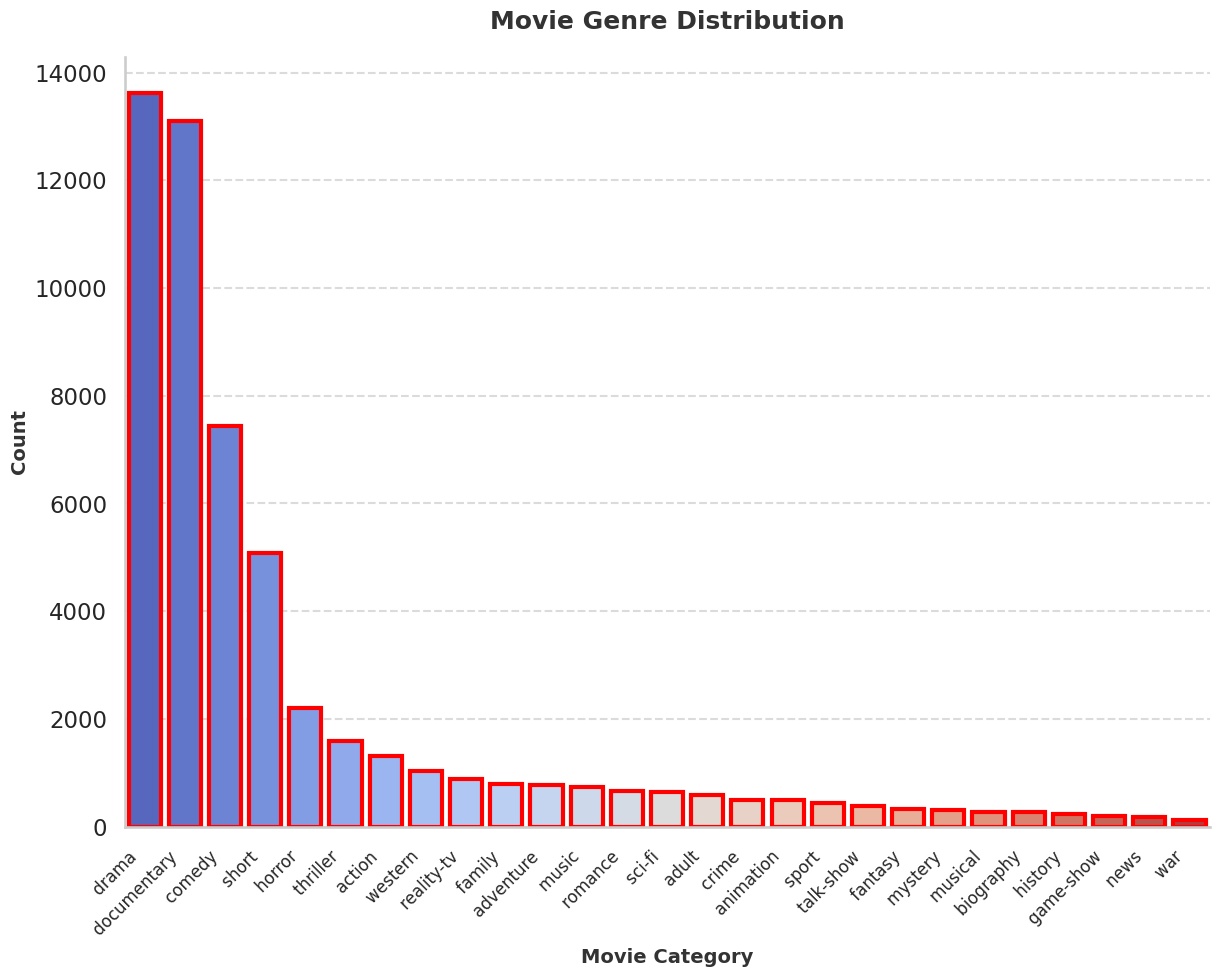

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="talk", palette="muted")
plt.figure(figsize=(14, 10))
sns.countplot(x='category', data=df_train,
              order=df_train['category'].value_counts().index,
              palette="coolwarm",
              edgecolor='red',
              linewidth=3)

# Customize labels and title with stylish fonts and sizes
plt.xlabel('Movie Category', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#333333')
plt.title('Movie Genre Distribution', fontsize=18, fontweight='bold', color='#333333', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

sns.despine()


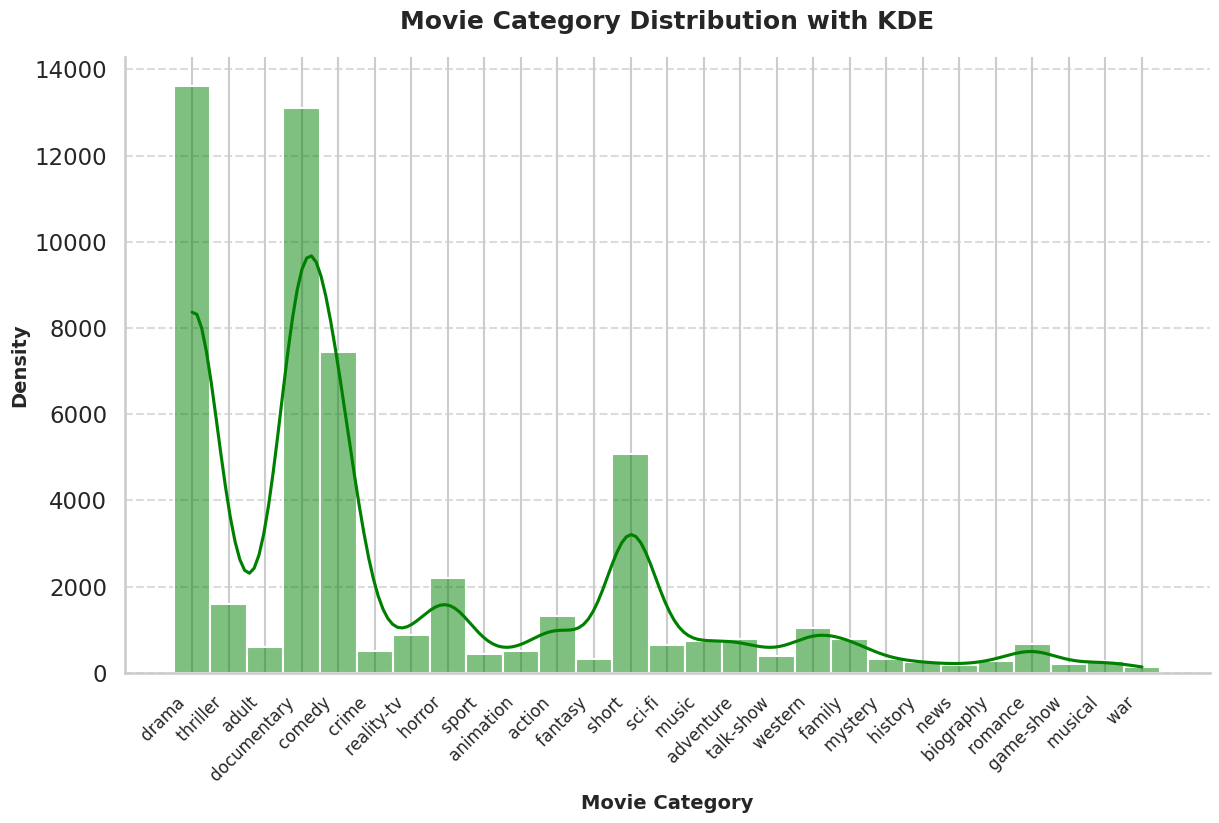

In [23]:
plt.figure(figsize=(14, 8))

sns.histplot(df_train.category, kde=True, color="green")

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Movie Category', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.title('Movie Category Distribution with KDE', fontsize=18, fontweight='bold', pad=20)

plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

sns.despine()


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000')])

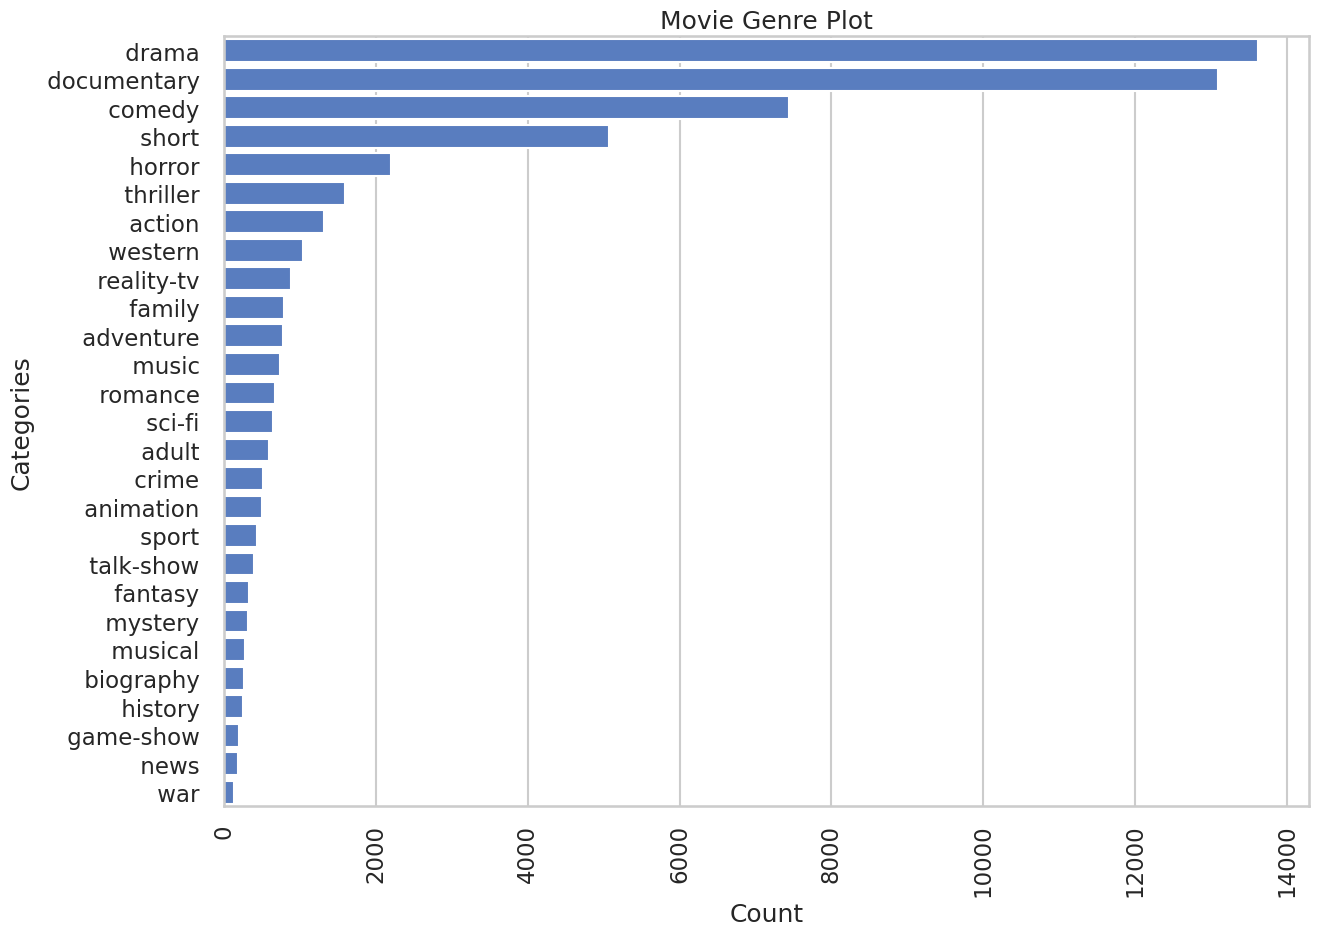

In [24]:
plt.figure(figsize=(14, 10))
count1 = df_train['category'].value_counts()

sns.barplot(x=count1.values, y=count1.index, orient='h')

plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)

In [25]:
df_combined = pd.concat([df_train, df_test],axis = 0)

In [26]:
df_combined.head()

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [27]:
df_combined.shape

(108414, 4)

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"])

In [29]:
df_combined.head()

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...
1,2,Cupid (1997),24,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),8,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),8,The film's title refers not only to the un-re...


In [30]:
df_combined['category'] = df_combined['category'].fillna(df_combined['category'].mode()[0])

In [31]:
df_combined.count()

,0
SN,108414
movie_name,108414
category,108414
confession,108414


In [33]:
vector = TfidfVectorizer()

In [35]:
x = vector.fit_transform(df_combined["confession"])

In [36]:
df_combined.head()

,SN,movie_name,category,confession
0,1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...
1,2,Cupid (1997),24,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),8,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),8,The film's title refers not only to the un-re...
